In [1]:
from IPython.core.display import HTML
with open('../style.css') as file:
    css = file.read()
HTML(css)

# AVL Trees

This notebook implements
[AVL trees](https://en.wikipedia.org/wiki/AVL_tree).  The set $\mathcal{A}$ of *AVL trees* is defined inductively:

  - $\texttt{Nil} \in \mathcal{A}$.
  - $\texttt{Node}(k,v,l,r) \in \mathcal{A}\quad$  iff 
      - $\texttt{Node}(k,v,l,r) \in \mathcal{B}$,
      - $l, r \in \mathcal{A}$, and
      - $|l.\texttt{height}() - r.\texttt{height}()| \leq 1$.

According to this definition, an AVL tree is an *ordered binary tree*
such that for every node $\texttt{Node}(k,v,l,r)$ in this tree the height of the left subtree $l$ and the right
subtree  $r$ differ at most by one. 

The class `AVLTree` represents the nodes of an AVL tree.  This class has the following member variables:

  - `mKey` is the key stored at the root of the tree,
  - `mValue` is the values associated with this key,
  - `mLeft` is the left subtree, 
  - `mRight` is the right subtree, and
  - `mHeight` is the height.

The constructor `__init__` creates the empty tree.

In [2]:
class AVLTree:
    def __init__(self):
        self.mKey    = None
        self.mValue  = None
        self.mLeft   = None
        self.mRight  = None
        self.mHeight = 0

Given an ordered binary tree $t$, the expression $t.\texttt{isEmpty}()$ checks whether $t$ is the empty tree.

In [3]:
def isEmpty(self):
    return self.mHeight == 0

AVLTree.isEmpty = isEmpty

Given an ordered binary tree $t$ and a key $k$, the expression $t.\texttt{find}(k)$ returns the value stored unter the key $k$.
The method `find` is defined inductively as follows:
  - $\texttt{Nil}.\texttt{find}(k) = \Omega$,

    because the empty tree is interpreted as the empty map.
  - $\texttt{Node}(k, v, l, r).\texttt{find}(k) = v$,
      
    because the node $\texttt{Node}(k,v,l,r)$ stores the assignment $k \mapsto v$.
  - $k_1 < k_2 \rightarrow \texttt{Node}(k_2, v, l, r).\texttt{find}(k_1) = l.\texttt{find}(k_1)$,

    because if $k_1$ is less than $k_2$, then any mapping for $k_1$ has to be stored in the left subtree  $l$.
  - $k_1 > k_2 \rightarrow \texttt{Node}(k_2, v, l, r).\texttt{find}(k_1) = r.\texttt{find}(k_1)$,

    because if $k_1$ is greater than $k_2$, then any mapping for $k_1$ has to be stored in the right subtree  $r$.

In [5]:
def find(self, key):
    if self.isEmpty():
        return
    elif self.mKey == key:
        return self.mValue
    elif key < self.mKey:
        return self.mLeft.find(key)
    else:
        return self.mRight.find(key)
    
AVLTree.find = find

The method  $\texttt{insert}()$ is specified via recursive equations.
  - $\texttt{Nil}.\texttt{insert}(k,v) = \texttt{Node}(k,v, \texttt{Nil}, \texttt{Nil})$,
  - $\texttt{Node}(k, v_2, l, r).\texttt{insert}(k,v_1) = \texttt{Node}(k, v_1, l, r)$,
  - $k_1 < k_2 \rightarrow 
          \texttt{Node}(k_2, v_2, l, r).\texttt{insert}(k_1, v_1) =
          \texttt{Node}\bigl(k_2, v_2, l.\texttt{insert}(k_1,v_1), r\bigr).\texttt{restore}()$,
  - $k_1 > k_2 \rightarrow 
         \texttt{Node}(k_2, v_2, l, r).\texttt{insert}\bigl(k_1, v_1\bigr) = 
         \texttt{Node}\bigl(k_2, v_2, l, r.\texttt{insert}(k_1,v_1)\bigr).\texttt{restore}()$.

The function $\texttt{restore}$ is an auxiliary function that is defined below.  This function restores the balancing condition if it is violated after an insertion.

In [4]:
def insert(self, key, value):
    if self.isEmpty():
        self.mKey    = key
        self.mValue  = value
        self.mLeft   = AVLTree()
        self.mRight  = AVLTree()
        self.mHeight = 1
    elif self.mKey == key:
        self.mValue = value
    elif key < self.mKey:
        self.mLeft.insert(key, value)
        self._restore()
    else:
        self.mRight.insert(key, value)
        self._restore()

AVLTree.insert = insert

The method $\texttt{self}.\texttt{delete}(k)$ removes the key $k$ from the tree $\texttt{self}$.  It is defined as follows:

  - $\texttt{Nil}.\texttt{delete}(k) = \texttt{Nil}$,
  - $\texttt{Node}(k,v,\texttt{Nil},r).\texttt{delete}(k) = r$,
  - $\texttt{Node}(k,v,l,\texttt{Nil}).\texttt{delete}(k) = l$,
  - $l \not= \texttt{Nil} \,\wedge\, r \not= \texttt{Nil} \,\wedge\, 
       \langle r',k_{min}, v_{min} \rangle := r.\texttt{delMin}()  \;\rightarrow\;
      \texttt{Node}(k,v,l,r).\texttt{delete}(k) = \texttt{Node}(k_{min},v_{min},l,r').\texttt{restore}()$
  - $k_1 < k_2 \rightarrow \texttt{Node}(k_2,v_2,l,r).\texttt{delete}(k_1) = 
    \texttt{Node}\bigl(k_2,v_2,l.\texttt{delete}(k_1),r\bigr).\texttt{restore}()$,
  - $k_1 > k_2 \rightarrow \texttt{Node}(k_2,v_2,l,r).\texttt{delete}(k_1) = 
     \texttt{Node}\bigl(k_2,v_2,l,r.\texttt{delete}(k_1)\bigr).\texttt{restore}()$.

In [6]:
def delete(self, key):
    if self.isEmpty():
        return
    if key == self.mKey:
        if self.mLeft.isEmpty():
            self._update(self.mRight)
        elif self.mRight.isEmpty():
            self._update(self.mLeft)
        else:
            self.mRight, self.mKey, self.mValue = self.mRight._delMin()
            self._restore()
    elif key < self.mKey:
        self.mLeft.delete(key)
        self._restore()
    else:
        self.mRight.delete(key)
        self._restore()
        
AVLTree.delete = delete

The method $\texttt{self}.\texttt{delMin}()$ removes the smallest key from the given tree $\texttt{self}$
and returns a triple of the form
$$ (\texttt{self}, k_m, v_m) $$
where $\texttt{self}$ is the tree that remains after removing the smallest key, while $k_m$ is the smallest key that has been found and $v_m$ is the associated value.  

The function is defined as follows:

  - $\texttt{Node}(k, v, \texttt{Nil}, r).\texttt{delMin}() = \langle r, k, v \rangle$,
  - $l\not= \texttt{Nil} \wedge \langle l',k_{min}, v_{min}\rangle := l.\texttt{delMin}() 
       \;\rightarrow\;
     \texttt{Node}(k, v, l, r).\texttt{delMin}() = 
     \langle \texttt{Node}(k, v, l', r).\texttt{restore}(), k_{min}, v_{min} \rangle
    $

In [7]:
def _delMin(self):
    if self.mLeft.isEmpty():
        return self.mRight, self.mKey, self.mValue
    else:
        ls, km, vm = self.mLeft._delMin()
        self.mLeft = ls
        self._restore()
        return self, km, vm
    
AVLTree._delMin = _delMin

Given two ordered binary trees $s$ and $t$, the expression $s.\texttt{update}(t)$ overwrites the attributes of $s$ with the corresponding attributes of $t$.

In [8]:
def _update(self, t):
    self.mKey    = t.mKey
    self.mValue  = t.mValue
    self.mLeft   = t.mLeft
    self.mRight  = t.mRight
    self.mHeight = t.mHeight
    
AVLTree._update = _update

The function $\texttt{restore}(\texttt{self})$ restores the balancing condition of the given binary tree
at the root node and recompute the variable $\texttt{mHeight}$.

The method $\texttt{restore}$ is specified via conditional equations.

  - $\texttt{Nil}.\texttt{restore}() = \texttt{Nil}$,

    because the empty tree already is an  AVL tree.
  - $|l.\texttt{height}() - r.\texttt{height}()| \leq 1 \rightarrow 
       \texttt{Node}(k,v,l,r).\texttt{restore}() = \texttt{Node}(k,v,l,r)$.

      If the balancing condition is satisfied, then nothing needs to be done. 
  - $\begin{array}[t]{cl}
              & l_1.\texttt{height}() = r_1.\texttt{height}() + 2    \\ 
       \wedge & l_1 = \texttt{Node}(k_2,v_2,l_2,r_2)                 \\
       \wedge & l_2.\texttt{height}() \geq r_2.\texttt{height}()     \\[0.2cm]
       \rightarrow & \texttt{Node}(k_1,v_1,l_1,r_1).\texttt{restore}() = 
                     \texttt{Node}\bigl(k_2,v_2,l_2,\texttt{Node}(k_1,v_1,r_2,r_1)\bigr)
       \end{array}
    $
  - $\begin{array}[t]{cl}
               & l_1.\texttt{height}() = r_1.\texttt{height}() + 2    \\ 
        \wedge & l_1 = \texttt{Node}(k_2,v_2,l_2,r_2)               \\
        \wedge & l_2.\texttt{height}() < r_2.\texttt{height}()     \\
        \wedge & r_2 = \texttt{Node}(k_3,v_3,l_3,r_3)               \\
        \rightarrow & \texttt{Node}(k_1,v_1,l_1,r_1).\texttt{restore}() = 
                      \texttt{Node}\bigl(k_3,v_3,\texttt{Node}(k_2,v_2,l_2,l_3),\texttt{Node}(k_1,v_1,r_3,r_1) \bigr)
        \end{array}
    $

  - $\begin{array}[t]{cl}
              & r_1.\texttt{height}() = l_1.\texttt{height}() + 2    \\ 
       \wedge & r_1 = \texttt{Node}(k_2,v_2,l_2,r_2)               \\
       \wedge & r_2.\texttt{height}() \geq l_2.\texttt{height}()     \\[0.2cm]
       \rightarrow & \texttt{Node}(k_1,v_1,l_1,r_1).\texttt{restore}() = 
                     \texttt{Node}\bigl(k_2,v_2,\texttt{Node}(k_1,v_1,l_1,l_2),r_2\bigr)
       \end{array}
    $
  - $\begin{array}[t]{cl}
               & r_1.\texttt{height}() = l_1.\texttt{height}() + 2    \\ 
        \wedge & r_1 = \texttt{Node}(k_2,v_2,l_2,r_2)               \\
        \wedge & r_2.\texttt{height}() < l_2.\texttt{height}()     \\
        \wedge & l_2 = \texttt{Node}(k_3,v_3,l_3,r_3)               \\
        \rightarrow & \texttt{Node}(k_1,v_1,l_1,r_1).\texttt{restore}() = 
                      \texttt{Node}\bigl(k_3,v_3,\texttt{Node}(k_1,v_1,l_1,l_3),\texttt{Node}(k_2,v_2,r_3,r_2) \bigr)
        \end{array}
    $

In [9]:
def _restore(self):
    if abs(self.mLeft.mHeight - self.mRight.mHeight) <= 1:
        self._restoreHeight()
        return
    if self.mLeft.mHeight > self.mRight.mHeight:
        k1, v1, l1, r1 = self.mKey, self.mValue, self.mLeft, self.mRight
        k2, v2, l2, r2 = l1.mKey, l1.mValue, l1.mLeft, l1.mRight
        if l2.mHeight >= r2.mHeight:
            self._setValues(k2, v2, l2, createNode(k1, v1, r2, r1))
        else: 
            k3, v3, l3, r3 = r2.mKey, r2.mValue, r2.mLeft, r2.mRight
            self._setValues(k3, v3, createNode(k2, v2, l2, l3),
                                    createNode(k1, v1, r3, r1))
    elif self.mRight.mHeight > self.mLeft.mHeight:
        k1, v1, l1, r1 = self.mKey, self.mValue, self.mLeft, self.mRight
        k2, v2, l2, r2 = r1.mKey, r1.mValue, r1.mLeft, r1.mRight
        if r2.mHeight >= l2.mHeight:
            self._setValues(k2, v2, createNode(k1, v1, l1, l2), r2)
        else:
            k3, v3, l3, r3 = l2.mKey, l2.mValue, l2.mLeft, l2.mRight
            self._setValues(k3, v3, createNode(k1, v1, l1, l3),
                                    createNode(k2, v2, r3, r2))
    self._restoreHeight()
    
AVLTree._restore = _restore

The function $\texttt{self}.\texttt{_setValues}(k, v, l, r)$ overwrites the member variables of the node $\texttt{self}$ with the given values.

In [10]:
def _setValues(self, k, v, l, r):
    self.mKey   = k
    self.mValue = v
    self.mLeft  = l
    self.mRight = r
    
AVLTree._setValues = _setValues

In [11]:
def _restoreHeight(self):
    self.mHeight = max(self.mLeft.mHeight, self.mRight.mHeight) + 1
    
AVLTree._restoreHeight = _restoreHeight

The function $\texttt{createNode}(k, v, l, r)$ creates an AVL-tree of that has the pair $(k, v)$ stored at its root, left subtree $l$ and right subtree $r$.

In [12]:
def createNode(key, value, left, right):
    node         = AVLTree()
    node.mKey    = key
    node.mValue  = value
    node.mLeft   = left
    node.mRight  = right
    node.mHeight = max(left.mHeight, right.mHeight) + 1
    return node

In [13]:
import graphviz as gv

Given an ordered binary tree, this function renders the tree graphically using `graphviz`.

In [14]:
def toDot(self):
    AVLTree.sNodeCount = 0 # this is a static variable of the class AVLTree
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    NodeDict = {}
    self._assignIDs(NodeDict)
    for n, t in NodeDict.items():
        if t.mValue != None:
            dot.node(str(n), label='{' + str(t.mKey) + '|' + str(t.mValue) + '}')
        elif t.mKey != None:
            dot.node(str(n), label=str(t.mKey))
        else:
            dot.node(str(n), label='', shape='point')
    for n, t in NodeDict.items():
        if not t.mLeft == None:
            dot.edge(str(n), str(t.mLeft.mID))
        if not t.mRight == None:
            dot.edge(str(n), str(t.mRight.mID))
    return dot

AVLTree.toDot = toDot

This method assigns a unique identifier with each node.  The dictionary `NodeDict` maps these identifiers to the nodes where they occur.

In [15]:
def _assignIDs(self, NodeDict):
    AVLTree.sNodeCount += 1
    self.mID = AVLTree.sNodeCount
    NodeDict[self.mID] = self
    if self.isEmpty():
        return
    self.mLeft ._assignIDs(NodeDict)
    self.mRight._assignIDs(NodeDict)
    
AVLTree._assignIDs = _assignIDs

The function $\texttt{demo}()$ creates a small ordered binary tree.

In [16]:
def demo():
    m = AVLTree()
    m.insert("anton",  123)
    m.insert("hugo" ,  345)
    m.insert("gustav", 789)
    m.insert("jens",   234)
    m.insert("hubert", 432)
    m.insert("andre",  342)
    m.insert("philip", 342)
    m.insert("rene",   345)
    return m

In [17]:
t = demo()
print(t.toDot())

digraph {
	node [shape=record style=rounded]
	1 [label="{gustav|789}"]
	2 [label="{anton|123}"]
	3 [label="{andre|342}"]
	4 [label="" shape=point]
	5 [label="" shape=point]
	6 [label="" shape=point]
	7 [label="{hugo|345}"]
	8 [label="{hubert|432}"]
	9 [label="" shape=point]
	10 [label="" shape=point]
	11 [label="{philip|342}"]
	12 [label="{jens|234}"]
	13 [label="" shape=point]
	14 [label="" shape=point]
	15 [label="{rene|345}"]
	16 [label="" shape=point]
	17 [label="" shape=point]
	1 -> 2
	1 -> 7
	2 -> 3
	2 -> 6
	3 -> 4
	3 -> 5
	7 -> 8
	7 -> 11
	8 -> 9
	8 -> 10
	11 -> 12
	11 -> 15
	12 -> 13
	12 -> 14
	15 -> 16
	15 -> 17
}


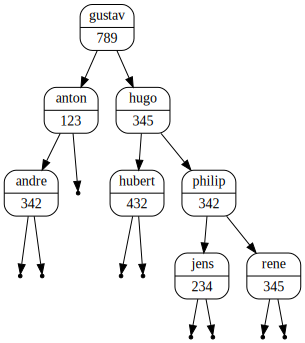

In [18]:
t.toDot()

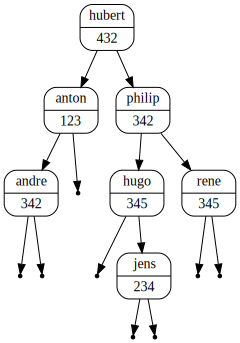

In [19]:
t.delete('gustav')
t.toDot()

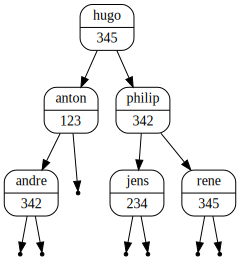

In [20]:
t.delete('hubert')
t.toDot()

Let's generate an ordered binary tree with random keys.

In [21]:
import random as rnd

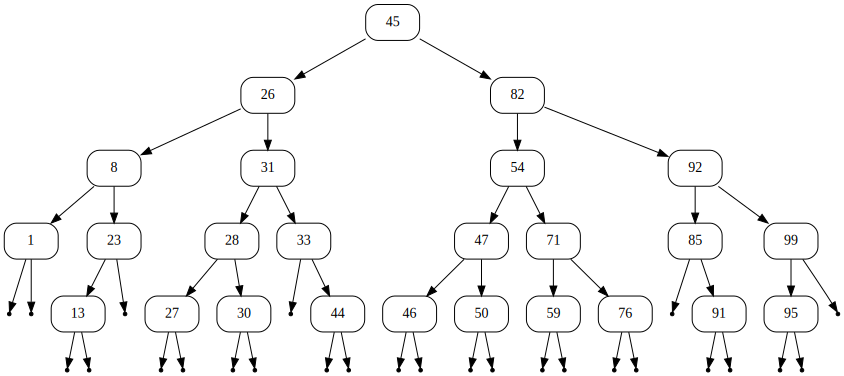

In [22]:
t = AVLTree()
for k in range(30):
    k = rnd.randrange(100)
    t.insert(k, None)
t.toDot()

This tree looks more or less balanced.  Lets us try to create a tree by inserting sorted numbers because that resulted in linear complexity for ordered binary trees.

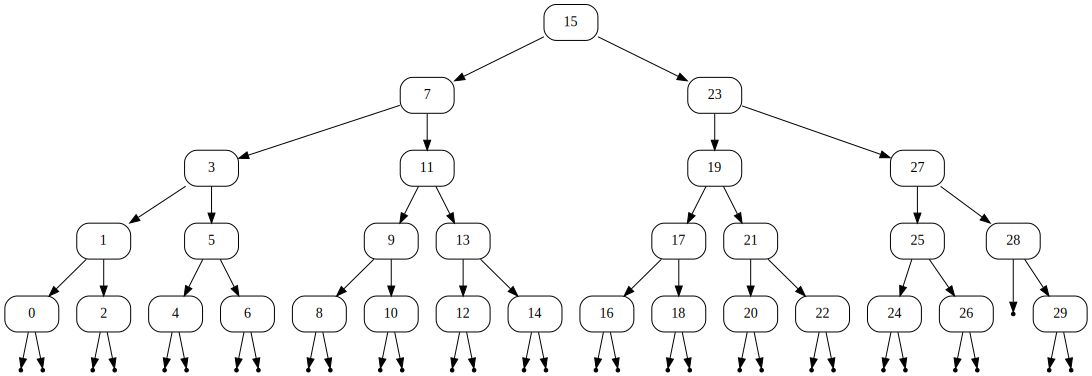

In [23]:
t = AVLTree()
for k in range(30):
    t.insert(k, None)
t.toDot()

Next, we compute the set of prime numbers $\leq 100$.  Mathematically, this set is given as follows:
$$ \bigl\{2, \cdots, 100 \bigr\} - \bigl\{ i \cdot j \bigm| i, j \in \{2, \cdots, 100 \}\bigr\}$$

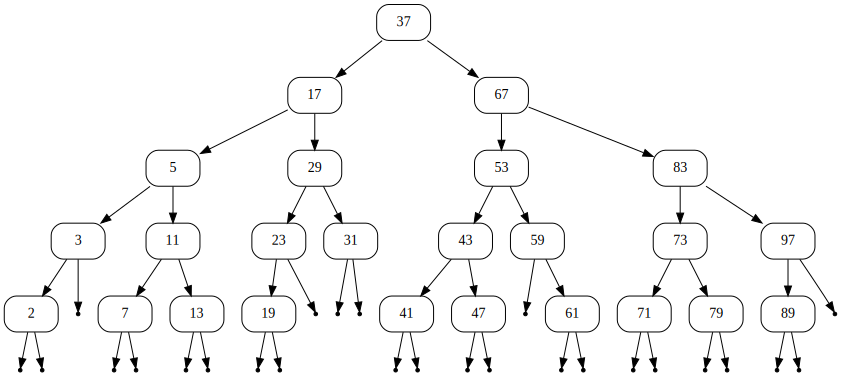

In [24]:
S = AVLTree()
for k in range(2, 101):
    S.insert(k, None)
for i in range(2, 101):
    for j in range(2, 101):
        S.delete(i * j)
S.toDot()

The function $t.\texttt{maxKey}()$ returns the biggest key in the tree $t$.  It is defined inductively:
  - $\texttt{Nil}.\texttt{maxKey}() = \Omega$,
  - $\texttt{Node}(k,v,l,\texttt{Nil}).\texttt{maxKey}() = k$,
  - $r \not= \texttt{Nil} \rightarrow \texttt{Node}(k,v,l,r).\texttt{maxKey}() = r.\texttt{maxKey}()$.

In [25]:
def maxKey(self):
    if self.isEmpty():
        return None
    if self.mRight.isEmpty():
        return self.mKey
    return self.mRight.maxKey()

AVLTree.maxKey = maxKey

The function $\texttt{leanTree}(h, k)$ computes an AVL tree of height $h$ that is as lean as possible.
All key in the tree will be integers that are bigger than $k$.  The definition by induction:
  - $\texttt{leanTree}(0, k) = \texttt{Nil}$,

    because there is only one AVL tree of height $0$ and this is the tree $\texttt{Nil}$.
  - $\texttt{leanTree}(1, k) = \texttt{Node}(k+1,0,\texttt{Nil}, \texttt{Nil})$,

    since, if we abstract from the actual keys and values, there is exactly one AVL tree of height $1$.
  - $\texttt{leanTree}(h+1,k).\texttt{maxKey}() = l \rightarrow 
     \texttt{leanTree}(h+2,k) = \texttt{Node}\bigl(l+1,\,0,\,\texttt{leanTree}(h+1,k),\,\texttt{leanTree}(h, l+1)\bigr)
    $.

In [26]:
def leanTree(h, k):
    if h == 0: 
        return AVLTree()
    if h == 1:
        return createNode(k + 1, None, AVLTree(), AVLTree())
    left = leanTree(h - 1, k)
    l    = left.maxKey()
    return createNode(l + 1, None, left, leanTree(h - 2, l + 1))

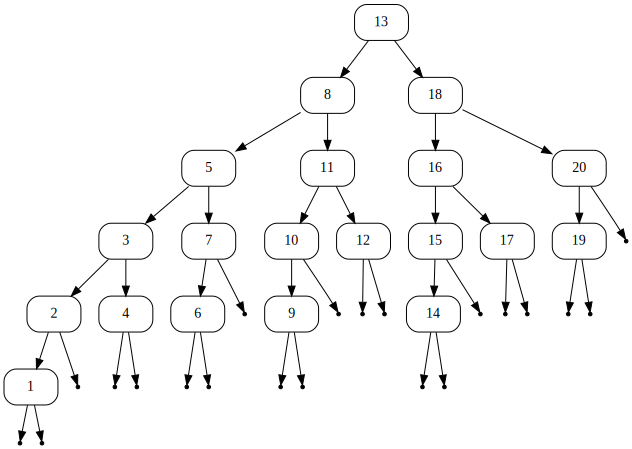

In [27]:
l = leanTree(6, 0)
l.toDot()

Height 0:


Height 1:


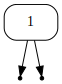

Height 2:


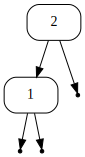

Height 3:


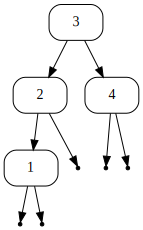

Height 4:


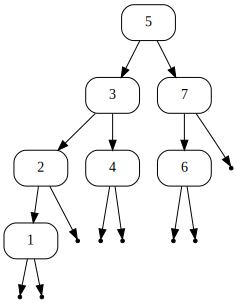

Height 5:


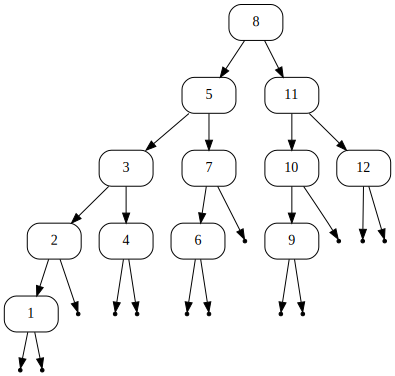

In [28]:
for k in range(6):
    l = leanTree(k, 0)
    print(f'Height {k}:')
    display(l.toDot())